<a href="https://colab.research.google.com/github/mrdbourke/pytorch-deep-learning/blob/main/video_notebooks/00_pytorch_fundamentals_video.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## 00. PyTorch Fundamentals

Resource notebook: https://www.learnpytorch.io/00_pytorch_fundamentals/

If you have a question: https://github.com/mrdbourke/pytorch-deep-learning/discussions

## [1. Introduction to Tensors](#p1)

> ### <font color = red> Creating Tensors </font>

## [2. Building Simple Momentum Trading Strategy](#p2)

> ### <font color = red> SMA </font>

## [3. Backtesting Trading Strategy](#p3)

> ### <font color = red> Backtesting is NOT Forecasting </font>

## [4. Performance Metrics](#p4)

> ### <font color = red> Sharpe, MDD, & CAGR </font>

## [5. What We Learned](#p5)

> ### <font color = red> Thus far... </font>

[See PyTorch documentation](https://pytorch.org/docs/stable/index.html)

In [ ]:
import torch
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

print(torch.__version__)
## Check if CUDA is available:
print("CUDA available:", torch.cuda.is_available())

## set pytorch tensor / device to use GPU
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print("Using device:", device)
### tensor = tensor.to(device) to move tensor to GPU

# # Example: Create a tensor and move it to the GPU
# x = torch.randn(3, 3).to(device)
# print(x)

2.5.1
CUDA available: True
Using device: cuda


## <a id = "p1">1. </a> <font color = "green"> Introduction to Tensors </font>  [back to table of contents](#top)

### Creating tensors

PyTorch tensors are created using `torch.Tensor()` = https://pytorch.org/docs/stable/tensors.html

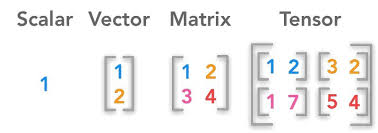
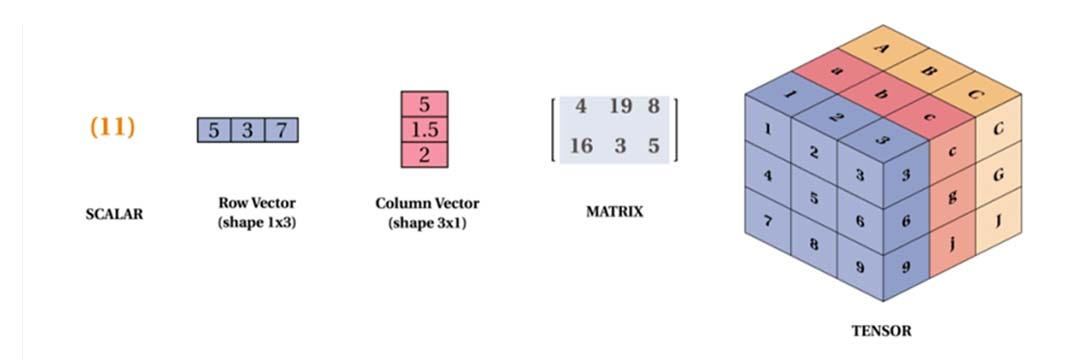

In [ ]:
### create a Scalar
scalar = torch.tensor(7)
display(f"A scalar in PyTorch:", scalar)
## Object type of scalar
display(f"Scalar object type: {type(scalar)}")
## Dimension of a scalar
display(f"Dimension of a scalar: {scalar.ndim}")
## Get tensor back as Python int
display(f"Get tensor back as a Python int: {scalar.item()}")

'A scalar in PyTorch:'

tensor(7)

"Scalar object type: <class 'torch.Tensor'>"

'Dimension of a scalar: 0'

'Get tensor back as a Python int: 7'

In [ ]:
# Vector
vector = torch.tensor([7, 7]) # 2 x 1 vector
display(f"A vector in PyTorch:", vector)
## Object type of vector
display(f"vector object type: {type(vector)}")
## Dimension of a vector
display(f"Dimension of a vector: {vector.ndim}")
## Shape of Vector
display(f"Shape of a vector: {vector.shape}")


## Cannot Get tensor back as Python int
## display(f"Get tensor back as a Python int: {vector.item()}")

'A vector in PyTorch:'

tensor([7, 7])

"vector object type: <class 'torch.Tensor'>"

'Dimension of a vector: 1'

'Shape of a vector: torch.Size([2])'

In [18]:
# MATRIX
MATRIX = torch.tensor([[7, 8],
                       [9, 10]])
display(f"A Matrix in PyTorch:", MATRIX)
## Object type of Matrix
display(f"Matrix object type: {type(MATRIX)}")
## Dimension of a Matrix
display(f"Dimension of a Matrix: {MATRIX.ndim}")
display(f"0-th Dimension of the Matrix:", {MATRIX[0]})
display(f"1-st Dimension of the Matrix:", {MATRIX[1]})
## Shape of Matrix
display(f"Shape of a Matrix: {MATRIX.shape}")

'A Matrix in PyTorch:'

tensor([[ 7,  8],
        [ 9, 10]])

"Matrix object type: <class 'torch.Tensor'>"

'Dimension of a Matrix: 2'

'0-th Dimension of the Matrix:'

{tensor([7, 8])}

'1-st Dimension of the Matrix:'

{tensor([ 9, 10])}

'Shape of a Matrix: torch.Size([2, 2])'

In [23]:
# TENSOR
TENSOR = torch.tensor([[[1, 2, 3],
                        [3, 6, 9],
                        [2, 4, 5]]])

display(f"A Tensor in PyTorch:", TENSOR)
## Object type of Tensor
display(f"Tensor object type: {type(TENSOR)}")
## Dimension of a Tensor
display(f"Dimension of a Tensor: {TENSOR.ndim}")
display(f"0-th Dimension of the Tensor:", {TENSOR[0]})
# display(f"1-st Dimension of the Tensor:", {TENSOR[1]})
# display(f"2-nd Dimension of the Tensor:", {TENSOR[2]})
## Shape of Tensor
display(f"Shape of a Tensor: {TENSOR.shape} is saying we have 1 (3 x 3) Tensor")

'A Tensor in PyTorch:'

tensor([[[1, 2, 3],
         [3, 6, 9],
         [2, 4, 5]]])

"Tensor object type: <class 'torch.Tensor'>"

'Dimension of a Tensor: 3'

'0-th Dimension of the Tensor:'

{tensor([[1, 2, 3],
         [3, 6, 9],
         [2, 4, 5]])}

'Shape of a Tensor: torch.Size([1, 3, 3]) is saying we have 1 (3 x 3) Tensor'

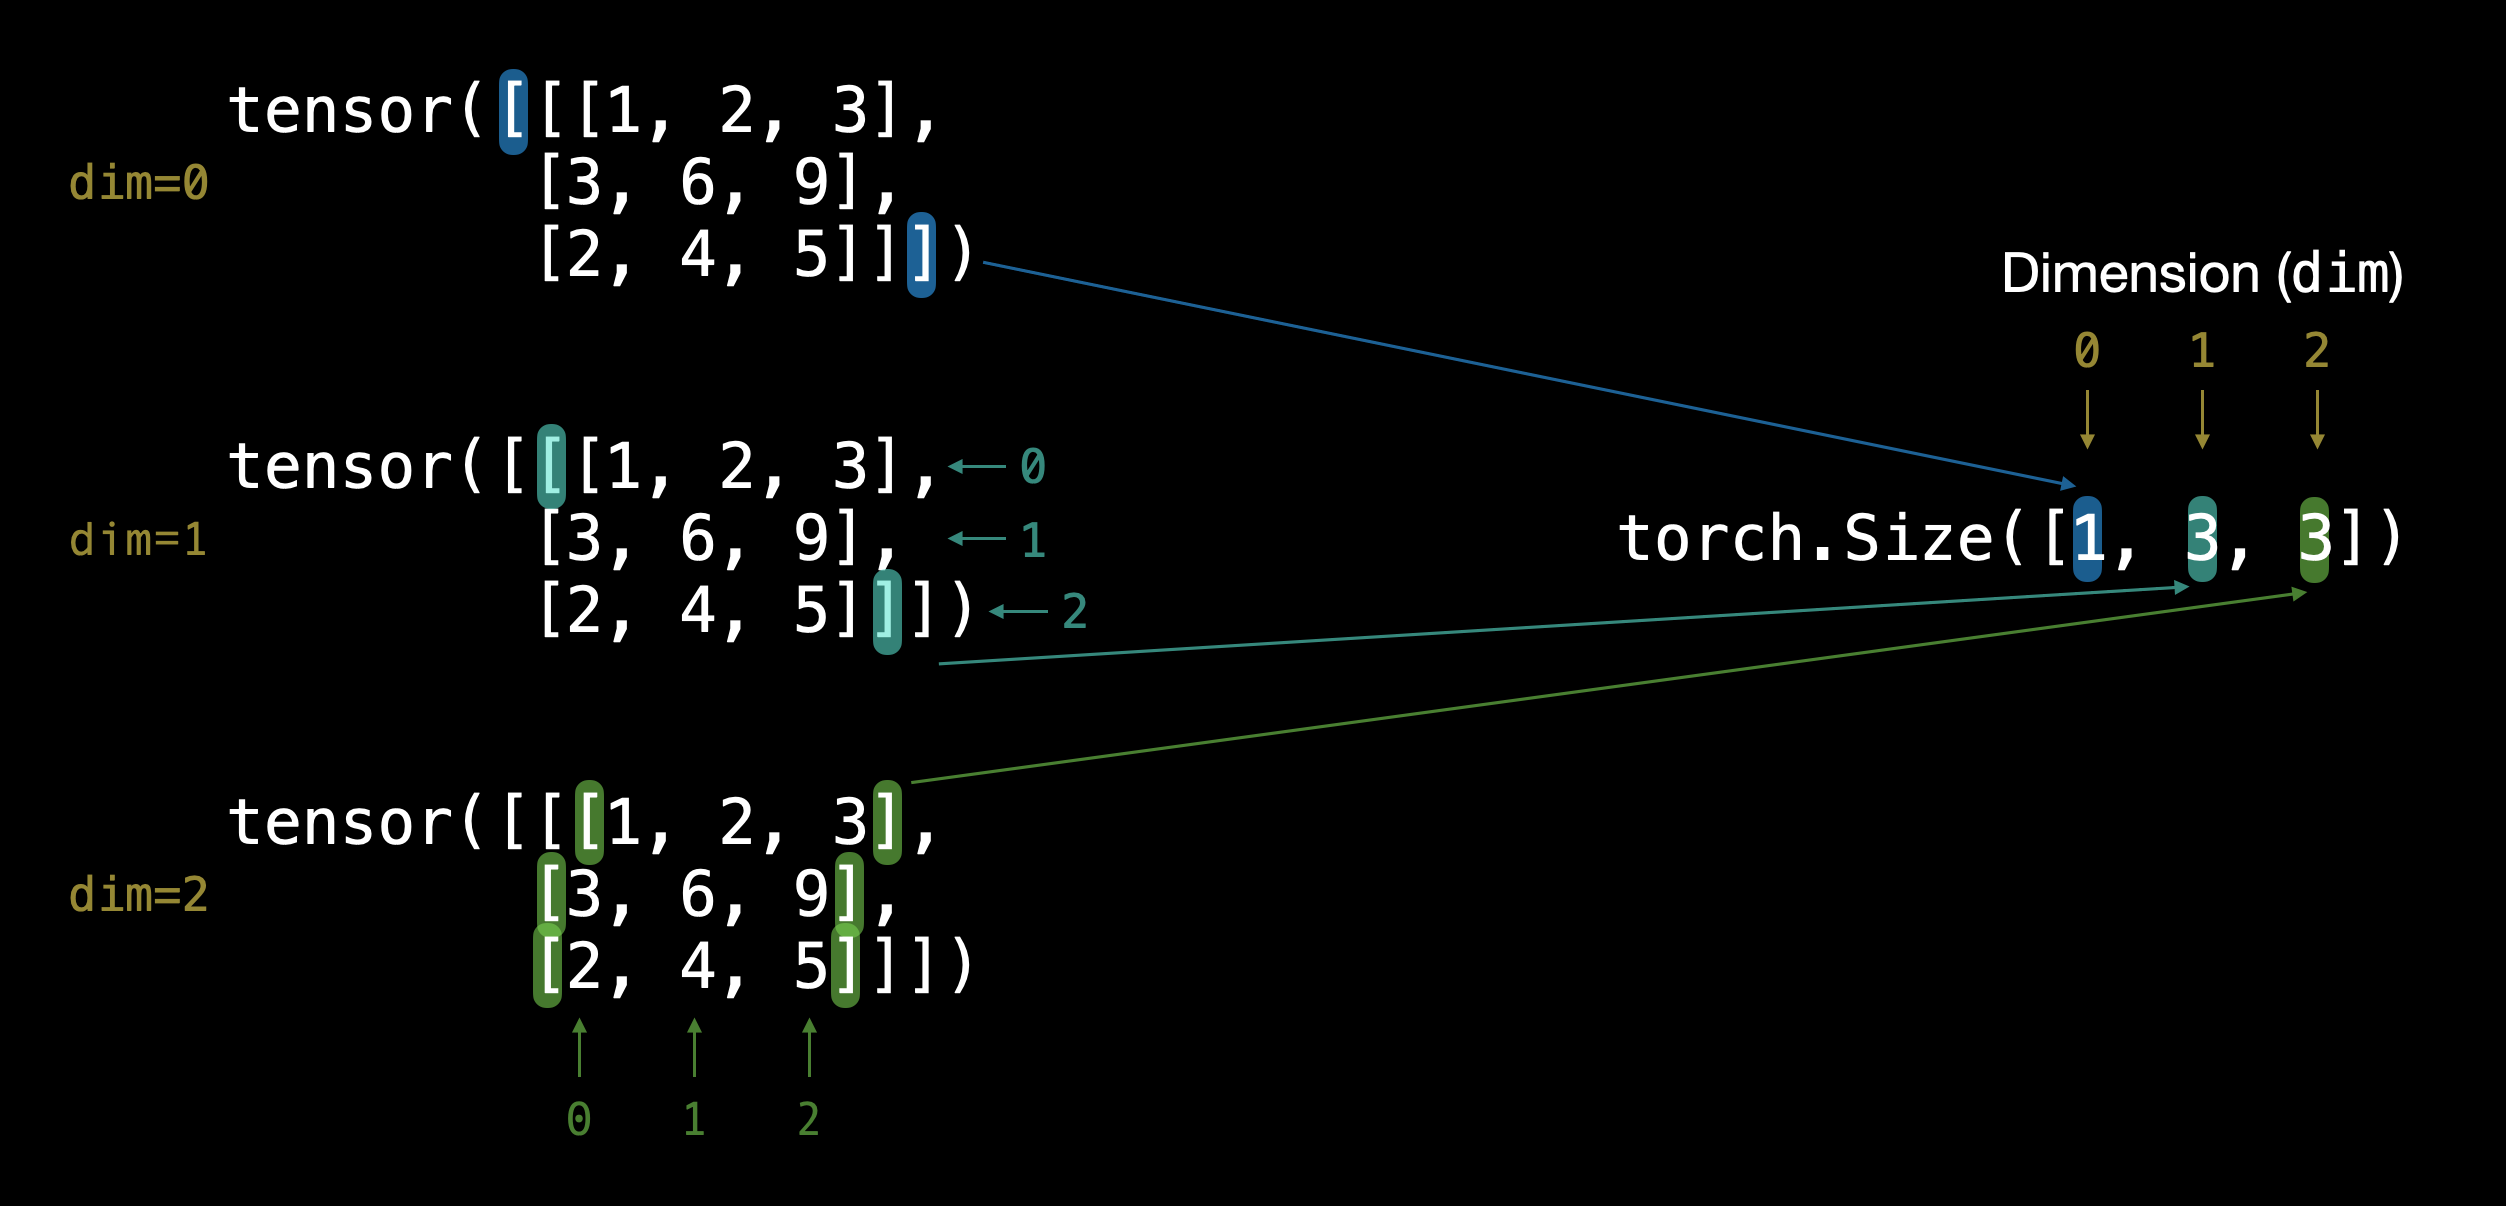

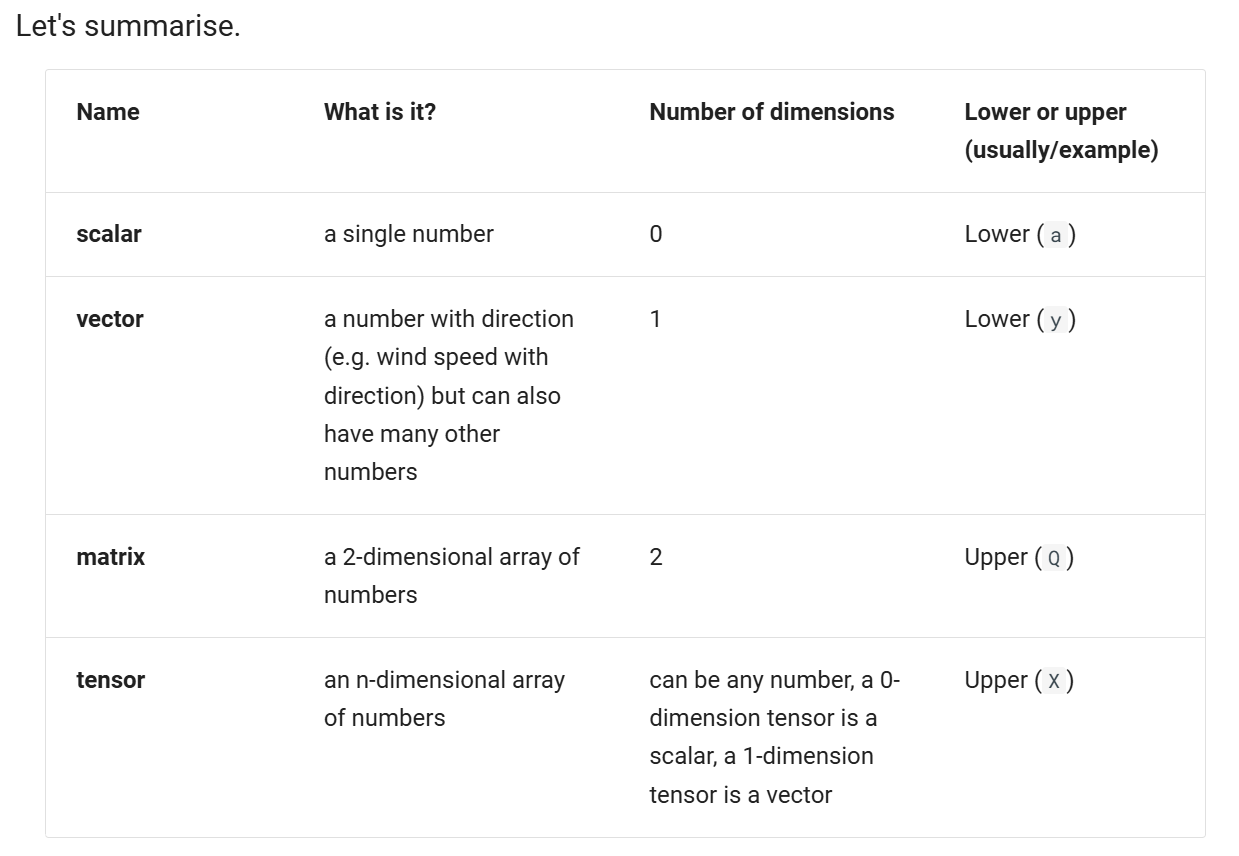

### Random tensors 
(1:35:35 14. Creating tensors)

Why random tensors?

Random tensors are important because the way many neural networks learn is that they start with tensors full of random numbers and then adjust those random numbers to better represent the data.

`Start with random numbers -> look at data -> update random numbers -> look at data -> update random numbers`

Torch random tensors - https://pytorch.org/docs/stable/generated/torch.rand.html

In [ ]:
# Create a random tensor of size (3, 4)
random_tensor = torch.rand(3, 4)
display(f"Random (3 x 4) tensor, torch.rand:", {random_tensor}, f"dtype: {random_tensor.dtype}")


# Create a random tensor with similar shape to an image tensor
random_image_size_tensor = torch.rand(size=(3, 224, 224)) # height, width, colour channels (R, G, B)
display(f"Random Image (3 x 224 x 224) tensor, torch.rand:", {random_image_size_tensor})
display(f"Shape: {random_image_size_tensor.shape}")
display(f"ndim: {random_image_size_tensor.ndim}")

'Random (3 x 4) tensor:'

{tensor([[0.0191, 0.2495, 0.7858, 0.2444],
         [0.3833, 0.3564, 0.0592, 0.2168],
         [0.3162, 0.6015, 0.3896, 0.6875]])}

'dtype: torch.float32'

'Random Image (3 x 224 x 224) tensor:'

{tensor([[[0.1413, 0.7940, 0.3406,  ..., 0.4578, 0.8780, 0.0123],
          [0.3531, 0.8149, 0.1928,  ..., 0.2022, 0.8464, 0.5829],
          [0.5594, 0.7474, 0.6081,  ..., 0.6951, 0.3112, 0.4586],
          ...,
          [0.3675, 0.0893, 0.2594,  ..., 0.8477, 0.1969, 0.6330],
          [0.9739, 0.2996, 0.8437,  ..., 0.5765, 0.4709, 0.0672],
          [0.7266, 0.1851, 0.3861,  ..., 0.3317, 0.0359, 0.0407]],
 
         [[0.7940, 0.4582, 0.7415,  ..., 0.3110, 0.4219, 0.2788],
          [0.3408, 0.2691, 0.7667,  ..., 0.4972, 0.7328, 0.9484],
          [0.6982, 0.7972, 0.0907,  ..., 0.2141, 0.3272, 0.5887],
          ...,
          [0.3150, 0.3656, 0.3270,  ..., 0.7388, 0.9528, 0.7481],
          [0.0626, 0.5578, 0.2766,  ..., 0.4972, 0.2253, 0.7363],
          [0.8499, 0.3035, 0.3826,  ..., 0.8896, 0.6459, 0.0136]],
 
         [[0.1996, 0.6340, 0.1051,  ..., 0.5231, 0.0102, 0.9677],
          [0.1047, 0.3978, 0.6803,  ..., 0.2986, 0.4934, 0.8230],
          [0.7044, 0.7388, 0.8790,  ...,

'Shape: torch.Size([3, 224, 224])'

'ndim: 3'

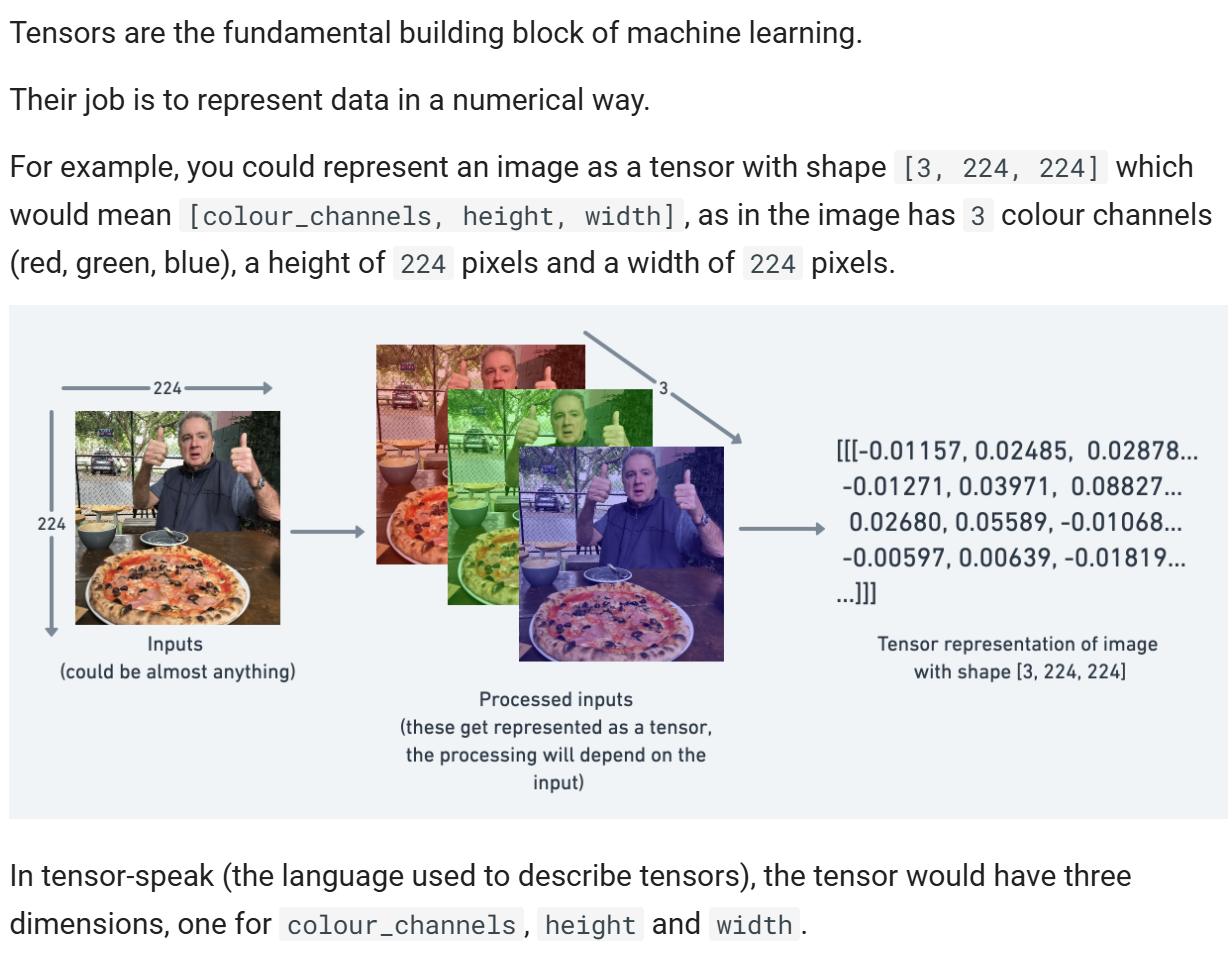

paused at https://www.youtube.com/watch?v=V_xro1bcAuA&t=92s 1:45:31

### Zeros and ones

In [ ]:
# Create a tensor of all zeros
zeros = torch.zeros(size=(3, 4))
display(f"Zeroes tensor, torch.zeros:", zeros)

# Create a tensor of all ones
ones = torch.ones(size=(3, 4))
display(f"Ones tensor, torch.ones:", ones, f"dtype: {ones.dtype}")

'Zeroes tensor:'

tensor([[0., 0., 0., 0.],
        [0., 0., 0., 0.],
        [0., 0., 0., 0.]])

'Ones tensor:'

tensor([[1., 1., 1., 1.],
        [1., 1., 1., 1.],
        [1., 1., 1., 1.]])

'dtype: torch.float32'

### Creating a range of tensors and tensors-like 

In [8]:
# Use torch.range() and get deprecated message, use torch.arange()
one_to_ten = torch.arange(start=1, end=11, step=1)
display(f"one_to_ten tensor, torch.arange:", one_to_ten)

# Creating tensors like
ten_zeros = torch.zeros_like(input=one_to_ten)
display(f"tensors-like: replicate the shape of another tensor, torch.zeros_like:", ten_zeros)

'one_to_ten tensor, torch.arange:'

tensor([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10])

'tensors-like: replicate the shape of another tensor, torch.zeros_like:'

tensor([0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

### Tensor datatypes 

**Note:** Tensor datatypes is one of the 3 big errors you'll run into with PyTorch & deep learning:
1. Tensors not right datatype
2. Tensors not right shape
3. Tensors not on the right device

Precision in computing - https://en.wikipedia.org/wiki/Precision_(computer_science)#:~:text=In%20computer%20science%2C%20the%20precision,used%20to%20express%20a%20value.

See PyTorch dtypes here: [Tensor Attributes](https://pytorch.org/docs/stable/tensor_attributes.html)
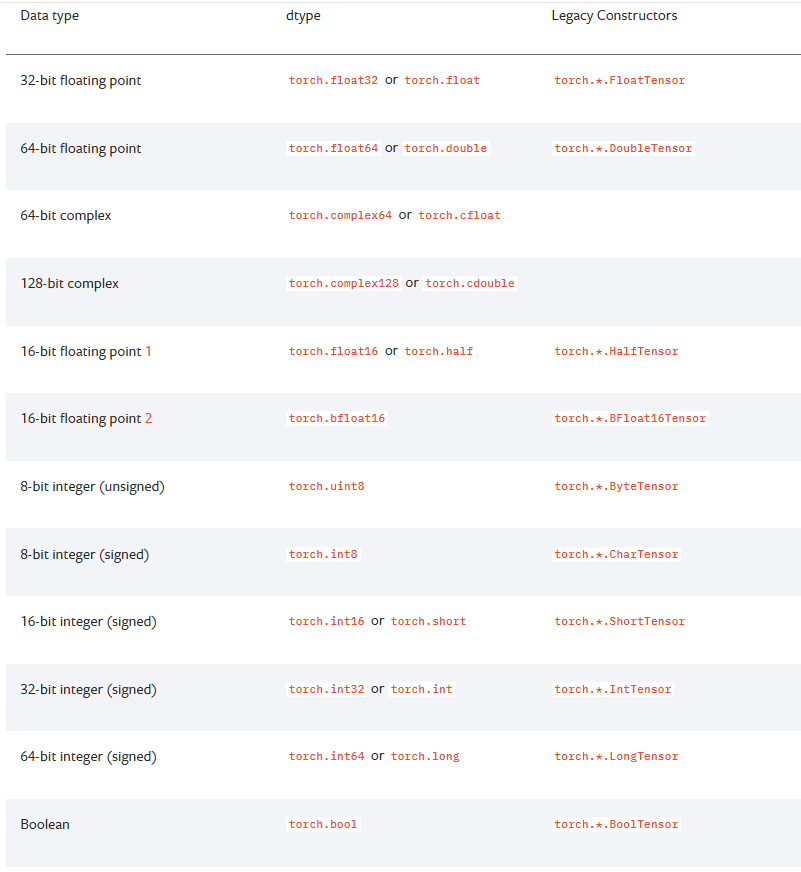

In [18]:
# Float 32 tensor
float_32_tensor = torch.tensor([3.0, 6.0, 9.0],
                               dtype=None, # what datatype is the tensor (e.g. float32 or float16)
                               device=None, # What device is your tensor on eg. "cuda" / "cpu" / "mps"
                               requires_grad=False) # whether or not to track gradients with this tensors operations
print(f"float_32_tensor, torch.tensor:", float_32_tensor, f"; dtype: {float_32_tensor.dtype}", f"; shape: {float_32_tensor.shape}", f"; device: {float_32_tensor.device} \n")

# Float 16 tensor (by recasting)
float_16_tensor = float_32_tensor.type(torch.float16)
print(f"float_16_tensor, recast by float_32_tensor.type:", float_16_tensor, f"; dtype: {float_16_tensor.dtype}", f"; shape: {float_16_tensor.shape}", f"; device: {float_16_tensor.device} \n")

# Hadamard Multiply 2 tensors with different dtypes
print(f"Multiply float16 and float32 tensor", (float_16_tensor * float_32_tensor), f"; dtype: {(float_16_tensor * float_32_tensor).dtype}", f"; shape: {(float_16_tensor * float_32_tensor).shape}", f"; device: {(float_16_tensor * float_32_tensor).device} \n")

float_32_tensor, torch.tensor: tensor([3., 6., 9.]) ; dtype: torch.float32 ; shape: torch.Size([3]) ; device: cpu 

float_16_tensor, recast by float_32_tensor.type: tensor([3., 6., 9.], dtype=torch.float16) ; dtype: torch.float16 ; shape: torch.Size([3]) ; device: cpu 

Multiply float16 and float32 tensor tensor([ 9., 36., 81.]) ; dtype: torch.float32 ; shape: torch.Size([3]) ; device: cpu 



In [19]:
int_32_tensor = torch.tensor([3, 6, 9], dtype=torch.long) # Create a tensor and set dtype as 64 bit int
print(f"int64 tensor:", int_32_tensor, f"; dtype: {int_32_tensor.dtype}", f"; shape: {int_32_tensor.shape}", f"; shape: {int_32_tensor.device} \n")
print(f"float_32_tensor * int_32_tensor:", float_32_tensor * int_32_tensor, "\n")

int64 tensor: tensor([3, 6, 9]) ; dtype: torch.int64 ; shape: torch.Size([3]) ; shape: cpu 

float_32_tensor * int_32_tensor: tensor([ 9., 36., 81.]) 



### Getting information from tensors (tensor attributes)

1. Tensors not right datatype - to do get datatype from a tensor, can use `tensor.dtype`
2. Tensors not right shape - to get shape from a tensor, can use `tensor.shape`
3. Tensors not on the right device - to get device from a tensor, can use `tensor.device`

In [ ]:
# Create a tensor
some_tensor = torch.rand(3, 4)
# Find out details about some tensor (tensor attributes)
print(f"some_tensor:", some_tensor, f"; dtype: {some_tensor.dtype}", f"; shape: {some_tensor.shape}", f"; shape: {some_tensor.device}")

some_tensor: tensor([[0.4497, 0.0711, 0.5998, 0.3441],
        [0.8265, 0.1952, 0.7547, 0.5368],
        [0.8606, 0.4134, 0.6972, 0.0802]]) ; dtype: torch.float32 ; shape: torch.Size([3, 4]) ; shape: cpu


### Manipulating Tensors (tensor operations)

Tensor opertions include:
* Addition
* Subtraction
* Multiplication (element-wise)
* Division
* Matrix multiplication

See [torch > Math Operations](https://pytorch.org/docs/stable/torch.html#math-operations) 

In [26]:
# Create a tensor and add 10 to it
tensor = torch.tensor([1, 2, 3])

print(f"operations using python math operators:", {tensor}, "\n")
print(f"tensor:", {tensor})
print(f"tensor addition:", {tensor + 10}) # add a 10 to tensor
print(f"tensor addition (subtraction):", {tensor - 10}) # subtract a 10 to tensor
print(f"tensor scalar multiplication:", {tensor * 10}) # Multiply tensor by 10
print(f"tensor scalar multiplication (division):", {tensor / 10}, "\n") # Divide tensor by 10

print(f"operations using Pytorch built-in functions", {tensor}, "\n")
print(f"tensor addition:", {torch.add(tensor, 10)}) # add a 10 to tensor
print(f"tensor scalar multiplication:", {torch.mul(tensor, 10)}) # Multiply tensor by 10


operations using python math operators: {tensor([1, 2, 3])} 

tensor: {tensor([1, 2, 3])}
tensor addition: {tensor([11, 12, 13])}
tensor addition (subtraction): {tensor([-9, -8, -7])}
tensor scalar multiplication: {tensor([10, 20, 30])}
tensor scalar multiplication (division): {tensor([0.1000, 0.2000, 0.3000])} 

operations using Pytorch built-in functions {tensor([1, 2, 3])} 

tensor addition: {tensor([11, 12, 13])}
tensor scalar multiplication: {tensor([10, 20, 30])}


### Matrix multiplication

Two main ways of performing multiplication in neural networks and deep learning:

1. Element-wise multiplication
2. Matrix mutliplication (dot product)

More information on multiplying matrices - https://www.mathsisfun.com/algebra/matrix-multiplying.html

There are two main rules that performing matrix mutliplication needs to satisfy:
1. The **inner dimensions** must match:
* `(3, 2) @ (3, 2)` won't work
* `(2, 3) @ (3, 2)` will work
* `(3, 2) @ (2, 3)` will work
2. The resulting matrix has the shape of the **outer dimensions**:
* `(2, 3) @ (3, 2)` -> `(2, 2)`
* `(3, 2) @ (2, 3)` -> `(3, 3)`

In [35]:
# Element wise multiplication
print(f"Element wise Hadamard multiplication: \n")
print(f"tensor:", tensor, f"; dtype: {tensor.dtype}", f"; shape: {tensor.shape}", f"; shape: {tensor.device}")
print(f"Using python math operators: {tensor * tensor}")
print(f"Using pytorch in-built function torch.mul: {torch.mul(tensor, tensor)} \n")

print(f"Pytorch torch.matmul: \n")
print(f"Using pytorch in-built function torch.matmul: {torch.matmul(tensor, tensor)}")

print(f"This matmul done using for loop \n")
#%%time
value = 0
for i in range(len(tensor)):
  value += tensor[i] * tensor[i]
print(value)
print(f"This matmul done using for loop: {value}")

Element wise Hadamard multiplication: 

tensor: tensor([1, 2, 3]) ; dtype: torch.int64 ; shape: torch.Size([3]) ; shape: cpu
Using python math operators: tensor([1, 4, 9])
Using pytorch in-built function torch.mul: tensor([1, 4, 9]) 

Pytorch torch.matmul: 

Using pytorch in-built function torch.matmul: 14
This matmul done using for loop 

tensor(14)
This matmul done using for loop: 14


In [ ]:
%%time
value = 0
for i in range(len(tensor)):
  value += tensor[i] * tensor[i]
print(value)

tensor(14)
CPU times: user 661 µs, sys: 876 µs, total: 1.54 ms
Wall time: 1.55 ms


In [ ]:
%%time
torch.matmul(tensor, tensor)

CPU times: user 67 µs, sys: 29 µs, total: 96 µs
Wall time: 101 µs


tensor(14)

### One of the most common errors in deep learning: shape errors

In [37]:
# Shapes for matrix multiplication 
tensor_A = torch.tensor([[1, 2],
                         [3, 4],
                         [5, 6]])

tensor_B = torch.tensor([[7, 10],
                         [8, 11],
                         [9, 12]])

# torch.mm(tensor_A, tensor_B) # torch.mm is the same as torch.matmul (it's an alias for writing less code)
torch.matmul(tensor_A, tensor_B)

RuntimeError: mat1 and mat2 shapes cannot be multiplied (3x2 and 3x2)

In [41]:
print(f"tensor_B: {tensor_B} \n")
print(f"Pytorch transpose tensor, tensor.T: {tensor_B.T}")

tensor_B: tensor([[ 7, 10],
        [ 8, 11],
        [ 9, 12]]) 

Pytorch transpose tensor, tensor.T: tensor([[ 7,  8,  9],
        [10, 11, 12]])


To fix our tensor shape issues, we can manipulate the shape of one of our tensors using a **transpose**.

A **transpose** switches the axes or dimensions of a given tensor.

In [ ]:
tensor_B, tensor_B.shape

(tensor([[ 7, 10],
         [ 8, 11],
         [ 9, 12]]), torch.Size([3, 2]))

In [ ]:
tensor_B.T, tensor_B.T.shape

(tensor([[ 7,  8,  9],
         [10, 11, 12]]), torch.Size([2, 3]))

In [42]:
# The matrix multiplication operation works when tensor_B is transposed
print(f"Original shapes: tensor_A = {tensor_A.shape}, tensor_B = {tensor_B.shape}")
print(f"New shapes: tensor_A = {tensor_A.shape} (same shape as above), tensor_B.T = {tensor_B.T.shape}")
print(f"Multiplying: {tensor_A.shape} @ {tensor_B.T.shape} <- inner dimensions must match")
print("Output:\n")
output = torch.matmul(tensor_A, tensor_B.T)
print(output) 
print(f"\nOutput shape: {output.shape}")

Original shapes: tensor_A = torch.Size([3, 2]), tensor_B = torch.Size([3, 2])
New shapes: tensor_A = torch.Size([3, 2]) (same shape as above), tensor_B.T = torch.Size([2, 3])
Multiplying: torch.Size([3, 2]) @ torch.Size([2, 3]) <- inner dimensions must match
Output:

tensor([[ 27,  30,  33],
        [ 61,  68,  75],
        [ 95, 106, 117]])

Output shape: torch.Size([3, 3])


## Finding the min, max, mean, sum, etc (tensor aggregation)

In [ ]:
# Create a tensor
x = torch.arange(1, 100, 10)
x, x.dtype

(tensor([ 1, 11, 21, 31, 41, 51, 61, 71, 81, 91]), torch.int64)

In [ ]:
# Find the min
torch.min(x), x.min()

(tensor(1), tensor(1))

In [ ]:
# Find the max
torch.max(x), x.max()

(tensor(91), tensor(91))

In [ ]:
# Find the mean - note: the torch.mean() function requires a tensor of float32 datatype to work
torch.mean(x.type(torch.float32)), x.type(torch.float32).mean()

(tensor(46.), tensor(46.))

In [ ]:
# Find the sum
torch.sum(x), x.sum()

(tensor(460), tensor(460))

## Finding the positional min and max

In [ ]:
x

tensor([ 1, 11, 21, 31, 41, 51, 61, 71, 81, 91])

In [ ]:
# Find the position in tensor that has the minimum value with argmin() -> returns index position of targt tensor where the minimum value occurs 
x.argmin()

tensor(0)

In [ ]:
x[0]

tensor(1)

In [ ]:
# Find the position in tensor that has the maximum value with argmax()
x.argmax()

tensor(9)

In [ ]:
x[9]

tensor(91)

## Reshaping, stacking, squeezing and unsqueezing tensors

* Reshaping - reshapes an input tensor to a defined shape
* View - Return a view of an input tensor of certain shape but keep the same memory as the original tensor
* Stacking - combine multiple tensors on top of each other (vstack) or side by side (hstack)
* Squeeze - removes all `1` dimensions from a tensor
* Unsqueeze - add a `1` dimension to a target tensor
* Permute - Return a view of the input with dimensions permuted (swapped) in a certain way

In [ ]:
# Let's create a tensor
import torch
x = torch.arange(1., 10.)
x, x.shape

(tensor([1., 2., 3., 4., 5., 6., 7., 8., 9.]), torch.Size([9]))

In [ ]:
# Add an extra dimension
x_reshaped = x.reshape(1, 9)
x_reshaped, x_reshaped.shape

(tensor([[1., 2., 3., 4., 5., 6., 7., 8., 9.]]), torch.Size([1, 9]))

In [ ]:
# Change the view 
z = x.view(1, 9)
z, z.shape

(tensor([[1., 2., 3., 4., 5., 6., 7., 8., 9.]]), torch.Size([1, 9]))

In [ ]:
# Changing z changes x (because a view of a tensor shares the same memory as the original input)
z[:, 0] = 5
z, x

(tensor([[5., 2., 3., 4., 5., 6., 7., 8., 9.]]),
 tensor([5., 2., 3., 4., 5., 6., 7., 8., 9.]))

In [ ]:
# Stack tensors on top of each other
x_stacked = torch.stack([x, x, x, x], dim=0)
x_stacked

tensor([[5., 2., 3., 4., 5., 6., 7., 8., 9.],
        [5., 2., 3., 4., 5., 6., 7., 8., 9.],
        [5., 2., 3., 4., 5., 6., 7., 8., 9.],
        [5., 2., 3., 4., 5., 6., 7., 8., 9.]])

In [ ]:
# torch.squeeze() - removes all single dimensions from a target tensor
print(f"Previous tensor: {x_reshaped}")
print(f"Previous shape: {x_reshaped.shape}")

# Remove extra dimensions from x_reshaped
x_squeezed = x_reshaped.squeeze()
print(f"\nNew tensor: {x_squeezed}")
print(f"New shape: {x_squeezed.shape}")

Previous tensor: tensor([[5., 2., 3., 4., 5., 6., 7., 8., 9.]])
Previous shape: torch.Size([1, 9])

New tensor: tensor([5., 2., 3., 4., 5., 6., 7., 8., 9.])
New shape: torch.Size([9])


In [ ]:
# torch.unsqueeze() - adds a single dimension to a target tensor at a specific dim (dimension)
print(f"Previous target: {x_squeezed}")
print(f"Previous shape: {x_squeezed.shape}")

# Add an extra dimension with unsqueeze
x_unsqueezed = x_squeezed.unsqueeze(dim=0)
print(f"\nNew tensor: {x_unsqueezed}")
print(f"New shape: {x_unsqueezed.shape}")

Previous target: tensor([5., 2., 3., 4., 5., 6., 7., 8., 9.])
Previous shape: torch.Size([9])

New tensor: tensor([[5., 2., 3., 4., 5., 6., 7., 8., 9.]])
New shape: torch.Size([1, 9])


In [ ]:
# torch.permute - rearranges the dimensions of a target tensor in a specified order
x_original = torch.rand(size=(224, 224, 3)) # [height, width, colour_channels]

# Permute the original tensor to rearrange the axis (or dim) order
x_permuted = x_original.permute(2, 0, 1) # shifts axis 0->1, 1->2, 2->0

print(f"Previous shape: {x_original.shape}") 
print(f"New shape: {x_permuted.shape}") # [colour_channels, height, width]

Previous shape: torch.Size([224, 224, 3])
New shape: torch.Size([3, 224, 224])


In [ ]:
x_original[0, 0, 0] = 728218
x_original[0, 0, 0], x_permuted[0, 0, 0]

(tensor(728218.), tensor(728218.))

## Indexing (selecting data from tensors)

Indexing with PyTorch is similar to indexing with NumPy.

In [ ]:
# Create a tensor
import torch
x = torch.arange(1, 10).reshape(1, 3, 3)
x, x.shape

(tensor([[[1, 2, 3],
          [4, 5, 6],
          [7, 8, 9]]]), torch.Size([1, 3, 3]))

In [ ]:
# Let's index on our new tensor
x[0]

tensor([[1, 2, 3],
        [4, 5, 6],
        [7, 8, 9]])

In [ ]:
# Let's index on the middle bracket (dim=1)
x[0][0]

tensor([1, 2, 3])

In [ ]:
# Let's index on the most inner bracket (last dimension)
x[0][1][1]

tensor(5)

In [ ]:
# You can also use ":" to select "all" of a target dimension
x[:, 0]

tensor([[1, 2, 3]])

In [ ]:
# Get all values of 0th and 1st dimensions but only index 1 of 2nd dimension
x[:, :, 1]

tensor([[2, 5, 8]])

In [ ]:
# Get all values of the 0 dimension but only the 1 index value of 1st and 2nd dimension
x[:, 1, 1]

tensor([5])

In [ ]:
# Get index 0 of 0th and 1st dimension and all values of 2nd dimension
x[0, 0, :]

tensor([1, 2, 3])

In [ ]:
# Index on x to return 9
print(x[0][2][2])

# Index on x to return 3, 6, 9
print(x[:, :, 2])

tensor(9)
tensor([[3, 6, 9]])


## PyTorch tensors & NumPy

NumPy is a popular scientific Python numerical computing library. 

And because of this, PyTorch has functionality to interact with it.

* Data in NumPy, want in PyTorch tensor -> `torch.from_numpy(ndarray)`
* PyTorch tensor -> NumPy -> `torch.Tensor.numpy()` 

In [ ]:
# NumPy array to tensor
import torch
import numpy as np

array = np.arange(1.0, 8.0)
tensor = torch.from_numpy(array) # warning: when converting from numpy -> pytorch, pytorch reflects numpy's default datatype of float64 unless specified otherwise
array, tensor

(array([1., 2., 3., 4., 5., 6., 7.]),
 tensor([1., 2., 3., 4., 5., 6., 7.], dtype=torch.float64))

In [ ]:
# Change the value of array, what will this do to `tensor`?
array = array + 1
array, tensor

(array([2., 3., 4., 5., 6., 7., 8.]),
 tensor([1., 2., 3., 4., 5., 6., 7.], dtype=torch.float64))

In [ ]:
# Tensor to NumPy array
tensor = torch.ones(7)
numpy_tensor = tensor.numpy()
tensor, numpy_tensor

(tensor([1., 1., 1., 1., 1., 1., 1.]),
 array([1., 1., 1., 1., 1., 1., 1.], dtype=float32))

In [ ]:
# Change the tesnor, what happens to `numpy_tensor`?
tensor = tensor + 1
tensor, numpy_tensor 

(tensor([2., 2., 2., 2., 2., 2., 2.]),
 array([1., 1., 1., 1., 1., 1., 1.], dtype=float32))

## Reproducbility (trying to take random out of random)

In short how a neural network learns:

`start with random numbers -> tensor operations -> update random numbers to try and make them better representations of the data -> again -> again -> again...`

To reduce the randomness in neural networks and PyTorch comes the concept of a **random seed**.

Essentially what the random seed does is "flavour" the randomness.

In [ ]:
import torch

# Create two random tensors
random_tensor_A = torch.rand(3, 4)
random_tensor_B = torch.rand(3, 4)

print(random_tensor_A)
print(random_tensor_B)
print(random_tensor_A == random_tensor_B)

tensor([[0.3675, 0.8410, 0.0507, 0.3165],
        [0.7275, 0.9676, 0.3901, 0.8840],
        [0.5177, 0.2239, 0.4362, 0.3602]])
tensor([[0.5229, 0.6719, 0.2790, 0.8198],
        [0.6689, 0.8659, 0.7849, 0.4268],
        [0.2076, 0.8076, 0.4377, 0.2555]])
tensor([[False, False, False, False],
        [False, False, False, False],
        [False, False, False, False]])


In [ ]:
# Let's make some random but reproducible tensors
import torch

# Set the random seed
RANDOM_SEED = 42
torch.manual_seed(RANDOM_SEED)
random_tensor_C = torch.rand(3, 4)

torch.manual_seed(RANDOM_SEED)
random_tensor_D = torch.rand(3, 4)

print(random_tensor_C)
print(random_tensor_D)
print(random_tensor_C == random_tensor_D)

tensor([[0.8823, 0.9150, 0.3829, 0.9593],
        [0.3904, 0.6009, 0.2566, 0.7936],
        [0.9408, 0.1332, 0.9346, 0.5936]])
tensor([[0.8823, 0.9150, 0.3829, 0.9593],
        [0.3904, 0.6009, 0.2566, 0.7936],
        [0.9408, 0.1332, 0.9346, 0.5936]])
tensor([[True, True, True, True],
        [True, True, True, True],
        [True, True, True, True]])


Extra resources for reproducibility:
* https://pytorch.org/docs/stable/notes/randomness.html
* https://en.wikipedia.org/wiki/Random_seed

 ## Running tensors and PyTorch objects on the GPUs (and making faster computations)

 GPUs = faster computation on numbers, thanks to CUDA + NVIDIA hardware + PyTorch working behind the scenes to make everything hunky dory (good).

### 1. Getting a GPU

1. Easiest - Use Google Colab for a free GPU (options to upgrade as well)
2. Use your own GPU - takes a little bit of setup and requires the investment of purchasing a GPU, there's lots of options..., see this post for what option to get: https://timdettmers.com/2020/09/07/which-gpu-for-deep-learning/
3. Use cloud computing - GCP, AWS, Azure, these services allow you to rent computers on the cloud and access them

For 2, 3 PyTorch + GPU drivers (CUDA) takes a little bit of setting up, to do this, refer to PyTorch setup documentation: https://pytorch.org/get-started/locally/ 

In [ ]:
!nvidia-smi

Sun Feb 20 00:24:35 2022       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 460.32.03    Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla P100-PCIE...  Off  | 00000000:00:04.0 Off |                    0 |
| N/A   32C    P0    28W / 250W |      0MiB / 16280MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

### 2. Check for GPU access with PyTorch

In [ ]:
# Check for GPU access with PyTorch
import torch
torch.cuda.is_available()

True

For PyTorch since it's capable of running compute on the GPU or CPU, it's best practice to setup device agnostic code: https://pytorch.org/docs/stable/notes/cuda.html#best-practices

E.g. run on GPU if available, else default to CPU

In [ ]:
# Setup device agnostic code 
device = "cuda" if torch.cuda.is_available() else "cpu"
device

'cuda'

In [ ]:
# Count number of devices
torch.cuda.device_count()

1

## 3. Putting tensors (and models) on the GPU

The reason we want our tensors/models on the GPU is because using a GPU results in faster computations.

In [ ]:
# Create a tensor (default on the CPU)
tensor = torch.tensor([1, 2, 3])

# Tensor not on GPU
print(tensor, tensor.device)

tensor([1, 2, 3]) cpu


In [ ]:
# Move tensor to GPU (if available)
tensor_on_gpu = tensor.to(device)
tensor_on_gpu

tensor([1, 2, 3], device='cuda:0')

### 4. Moving tensors back to the CPU

In [ ]:
# If tensor is on GPU, can't transform it to NumPy
tensor_on_gpu.numpy()

TypeError: ignored

In [ ]:
# To fix the GPU tensor with NumPy issue, we can first set it to the CPU
tensor_back_on_cpu = tensor_on_gpu.cpu().numpy()
tensor_back_on_cpu

array([1, 2, 3])

In [ ]:
tensor_on_gpu

tensor([1, 2, 3], device='cuda:0')

## Exercises & Extra-curriculum

See exercises for this notebook here: https://www.learnpytorch.io/00_pytorch_fundamentals/#exercises 
See the template exercises notebook for this module here: https://github.com/mrdbourke/pytorch-deep-learning/blob/main/extras/exercises/00_pytorch_fundamentals_exercises.ipynb 